In [1]:

from sentence_transformers import SentenceTransformer
from coco_extractor import COCOCaptionExtractor
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path


ModuleNotFoundError: No module named 'sentence_transformers'

In [2]:
ANNOTATIONS_PATH = "/storage/group/dataset_mirrors/old_common_datasets/coco/annotations"
IMAGES_PATH = "/storage/group/dataset_mirrors/old_common_datasets/coco/images/train2014"
extractor = COCOCaptionExtractor(ANNOTATIONS_PATH, IMAGES_PATH)


Loading COCO annotations from /storage/group/dataset_mirrors/old_common_datasets/coco/annotations/captions_train2014.json...
loading annotations into memory...
Done (t=1.20s)
creating index...
index created!
Loaded 82783 images with annotations


In [10]:
print(len(extractor.get_all_filepaths()))
extractor.get_all_captions()

82783


{'COCO_train2014_000000057870.jpg': ['A restaurant has modern wooden tables and chairs.',
  'A long restaurant table with rattan rounded back chairs.',
  'a long table with a plant on top of it surrounded with wooden chairs ',
  'A long table with a flower arrangement in the middle for meetings',
  'A table is adorned with wooden chairs with blue accents.'],
 'COCO_train2014_000000384029.jpg': ['A man preparing desserts in a kitchen covered in frosting.',
  'A chef is preparing and decorating many small pastries.',
  'A baker prepares various types of baked goods.',
  'a close up of a person grabbing a pastry in a container',
  'Close up of a hand touching various pastries.'],
 'COCO_train2014_000000222016.jpg': ['a big red telephone booth that a man is standing in',
  'a person standing inside of a phone booth ',
  'this is an image of a man in a phone booth.',
  'A man is standing in a red phone booth.',
  'A man using a phone in a phone booth.'],
 'COCO_train2014_000000520950.jpg': 

In [8]:
print(extractor.len_files())
print(extractor.len_captions())


82783
dict_keys([57870, 384029, 222016, 520950, 69675, 547471, 122688, 392136, 398494, 90570, 504616, 161919, 457732, 44404, 4428, 170558, 405613, 283524, 37015, 71631, 491269, 365363, 64460, 581674, 470072, 344806, 84427, 317237, 409382, 570608, 469605, 356702, 405207, 472925, 214704, 279108, 438422, 257350, 393493, 62426, 19380, 485894, 446014, 530683, 292835, 262845, 299411, 42493, 239811, 2024, 95133, 287541, 441488, 179620, 70000, 536587, 543877, 420721, 540162, 218956, 318574, 172899, 352884, 394326, 535786, 357684, 576757, 165499, 181104, 55627, 241364, 209967, 153674, 354444, 98760, 311914, 467311, 236772, 49183, 426038, 309322, 318189, 343322, 36633, 213546, 378710, 189993, 551125, 77806, 546451, 444546, 147016, 497616, 520208, 199628, 280980, 167613, 142088, 301778, 454325, 289019, 246804, 62604, 388911, 412535, 62279, 496939, 66514, 93785, 486320, 217306, 287927, 269829, 353139, 574001, 96557, 559527, 477797, 223726, 413746, 313932, 524068, 270912, 528906, 278347, 267688, 37

In [16]:
from datetime import datetime
datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

'2025-06-10_11:44:41'

In [20]:
test = Path("/yoyoyo/so")
print(test/"yo")

/yoyoyo/so/yo


In [21]:
for i in extractor.iter_image_captions(1):
    print(i)
    print(Path(i["image_path"]).name)
    # print(i['image_id'],i['file_name'],i['image_path'],i['width'] ,    i['height'],i['captions'],i['num_captions'])
    

Iterating through image-caption pairs...
{'image_path': '/storage/group/dataset_mirrors/old_common_datasets/coco/images/train2014/COCO_train2014_000000057870.jpg', 'captions': ['A restaurant has modern wooden tables and chairs.', 'A long restaurant table with rattan rounded back chairs.', 'a long table with a plant on top of it surrounded with wooden chairs ', 'A long table with a flower arrangement in the middle for meetings', 'A table is adorned with wooden chairs with blue accents.']}
COCO_train2014_000000057870.jpg


In [7]:
len(list(np.load("/usr/prakt/s0115/AFM_SEARCH/eval_coco/embeddings/ViT-L_14@336px_filenames.npy")))

82782

Iterating through image-caption pairs...


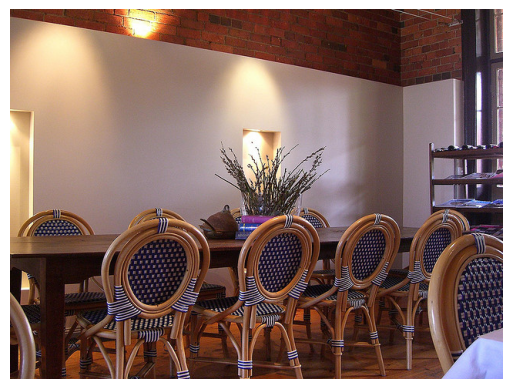

A restaurant has modern wooden tables and chairs.
A long restaurant table with rattan rounded back chairs.
a long table with a plant on top of it surrounded with wooden chairs 
A long table with a flower arrangement in the middle for meetings
A table is adorned with wooden chairs with blue accents.


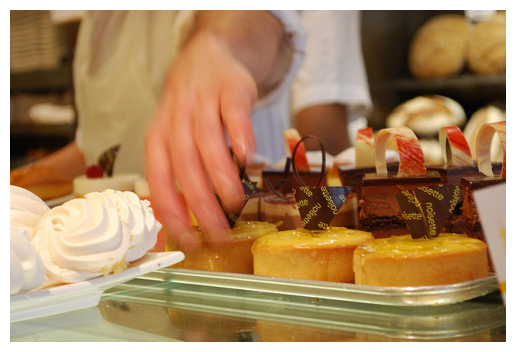

A man preparing desserts in a kitchen covered in frosting.
A chef is preparing and decorating many small pastries.
A baker prepares various types of baked goods.
a close up of a person grabbing a pastry in a container
Close up of a hand touching various pastries.


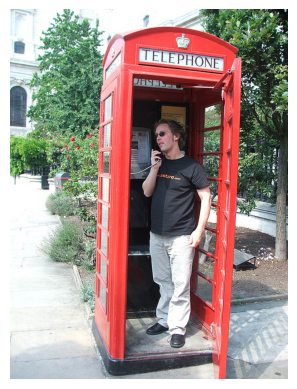

a big red telephone booth that a man is standing in
a person standing inside of a phone booth 
this is an image of a man in a phone booth.
A man is standing in a red phone booth.
A man using a phone in a phone booth.


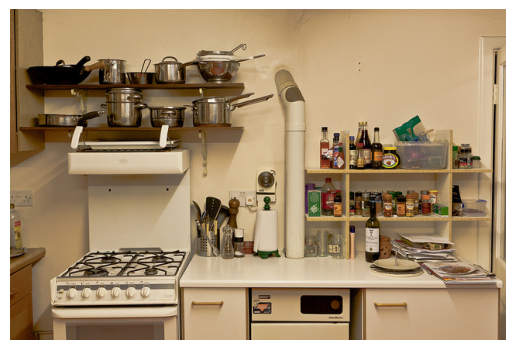

the kitchen is full of spices on the rack
A kitchen with counter, oven and other accessories.
A small kitchen that utilizes all of its space. 
This small kitchen has pots, pans and spices on display
A VERY SMALL KITCHEN WITH A STOVE AND A SHELF OF POTS 


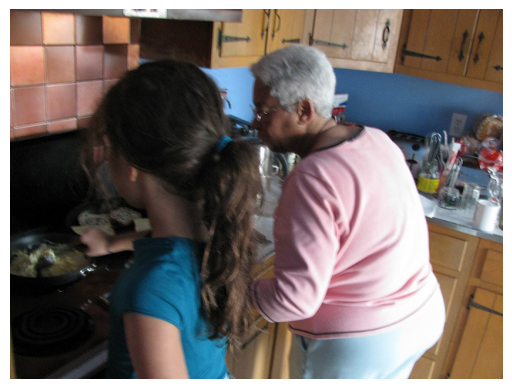

A child and woman are cooking in the kitchen.
A woman glances at a young girl's cooking on the stovetop
A young girl and a woman preparing food in a kitchen.
a young person and an older person in a kitchen
Two women cooking on stove in a kitchen together.


In [3]:
from PIL import Image

for item in extractor.iter_image_captions(max_images=5, output_format='dict'):
    image_path = item['image_path']
    ground_truth_captions = item['captions']
    

    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    for caption in ground_truth_captions:
        print(caption)